In [16]:
import os
import sys
import fitsio
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import astropy.io.fits   as fits
from astropy.table import Table

In [7]:
sys.path.append('{}'.format(os.environ['HOME']))
sys.path.append('{}/DESI/src/lumfn'.format(os.environ['HOME']))

In [8]:
from findfile import findfile

In [45]:

version = 'GAMA4_reserve'
dryrun = False
survey = 'GAMA'

fpath   =  findfile(ftype='ddp_n8', version=version, dryrun=dryrun, survey=survey)


In [46]:
dat = Table.read(fpath)

In [47]:
print(len(dat))

121975


In [44]:
dat.dtype.names

('CATAID',
 'OBJID',
 'RA',
 'DEC',
 'R_PETRO',
 'ZGAMA',
 'NQ',
 'SPECID',
 'SURVEY_CLASS',
 'UMAG_DRED_SDSS',
 'GMAG_DRED_SDSS',
 'RMAG_DRED_SDSS',
 'IMAG_DRED_SDSS',
 'ZMAG_DRED_SDSS',
 'ZSURV',
 'LUMDIST',
 'DISTMOD',
 'FIELD',
 'IN_D8LUMFN',
 'CONSERVATIVE',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'ROTCARTESIAN_X',
 'ROTCARTESIAN_Y',
 'ROTCARTESIAN_Z',
 'GMR',
 'DETMAG',
 'REST_GMR_0P1',
 'REST_GMR_0P1_WARN',
 'REST_GMR_0P1_INDEX',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'Q_COLOR_0P0',
 'EQ_ALL_0P0',
 'EQ_COLOR_0P0',
 'MALL_0P0',
 'MCOLOR_0P0',
 'MQZERO_0P0',
 'Z_THETA_QALL',
 'Z_THETA_QZERO',
 'Z_THETA_QCOLOR',
 'DDPKCORR_R0P1',
 'DDPKCORR_G0P1',
 'DDPKCORR_R0P0',
 'DDPKCORR_G0P0',
 'DDPMALL_0P0',
 'DELTA_DETMAG_FAINT',
 'ZMAX',
 'ZMAX_WARN',
 'DELTA_DETMAG_BRIGHT',
 'ZMIN',
 'ZMIN_WARN',
 'VMAX')

In [49]:
isbad = (dat['DDP1_DELTA8'] < -20) | (dat['REST_GMR_0P1'] < -40)

In [50]:
dat = dat[~isbad]

In [58]:
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

In [79]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, s=0.1, **kwargs )

    ax.set_ylabel('GMR (rest, zref=0.0)')
    ax.set_xlabel('log(1+d8)')
    
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax



In [80]:

mask = (dat['REST_GMR_0P0'] > 0) & (dat['REST_GMR_0P0'] < 1)

dat = dat[mask]

x = np.log10(1+dat['DDP1_DELTA8']).data
y = dat['REST_GMR_0P0'].data

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


<AxesSubplot:xlabel='log(1+d8)', ylabel='GMR (rest, zref=0.0)'>

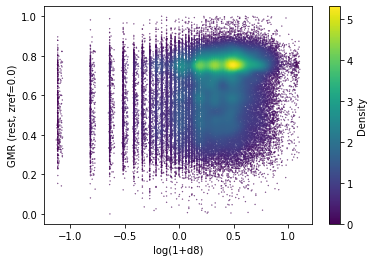

In [81]:

density_scatter( x, y, bins = [30,30] )

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


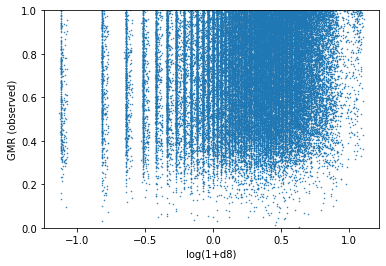

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


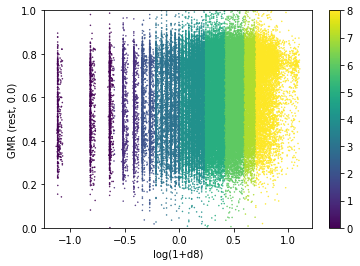

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


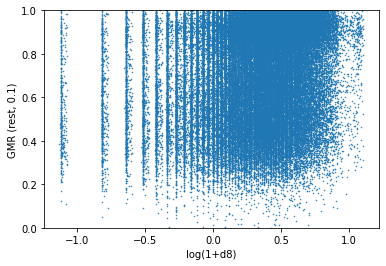

In [87]:
plt.scatter(np.log10(1+dat['DDP1_DELTA8']), dat['GMR'], s=0.25)
plt.ylim(0,1)
plt.xlabel('log(1+d8)')
plt.ylabel('GMR (observed)')
plt.show()

plt.scatter(np.log10(1+dat['DDP1_DELTA8']), dat['REST_GMR_0P0'], c=dat['DDP1_DELTA8_TIER'], s=0.25)
plt.ylim(0,1)
plt.xlabel('log(1+d8)')
plt.ylabel('GMR (rest, 0.0)')
plt.colorbar()
plt.show()

plt.scatter(np.log10(1+dat['DDP1_DELTA8']), dat['REST_GMR_0P1'], s=0.25)
plt.ylim(0,1)
plt.xlabel('log(1+d8)')
plt.ylabel('GMR (rest, 0.1)')
plt.show()


In [96]:
len(tag)

78309

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '$(g-r)_0$')

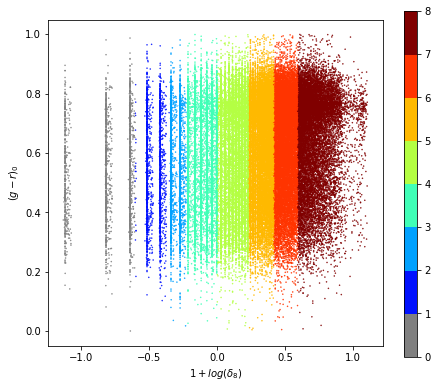

In [101]:
import matplotlib as mpl

x = np.log10(1+dat['DDP1_DELTA8']).data
y = dat['REST_GMR_0P0'].data
tag = dat['DDP1_DELTA8_TIER'].data

fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # setup the plot

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 8, 9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x, y, c=tag, s=0.25, cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')


ax.set_xlabel(r'$1+log(\delta_8)$')
ax.set_ylabel(r'$(g-r)_0$')


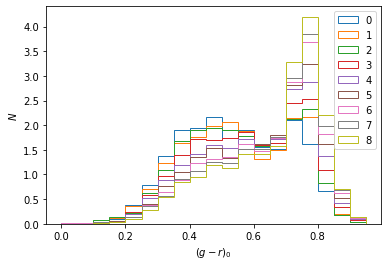

In [116]:
for idx in np.unique(dat['DDP1_DELTA8_TIER']):
    
    intier = (dat['DDP1_DELTA8_TIER'] == idx)
    
    dat_tier = dat[intier]
    
    plt.hist(dat_tier['REST_GMR_0P0'], histtype='step', label=idx, density=True, bins=np.arange(0, 1, 0.05))
    plt.legend()
    
    plt.xlabel(r'$(g-r)_0$')
    plt.ylabel(r'$N$')

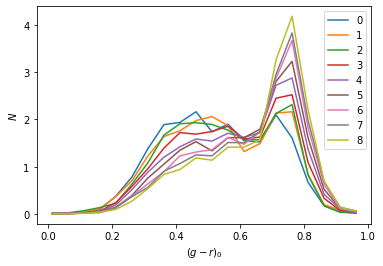

In [117]:
for idx in np.unique(dat['DDP1_DELTA8_TIER']):
    
    intier = (dat['DDP1_DELTA8_TIER'] == idx)
    
    dat_tier = dat[intier]
    
    #plt.hist(dat_tier['REST_GMR_0P0'], histtype='step', label=idx, density=True, bins=np.arange(0, 1, 0.05))
    #plt.legend()
    
    bins = np.arange(0, 1.0001, 0.05)
    dbin = 0.025
    
    ns, _ = np.histogram(dat_tier['REST_GMR_0P0'], bins=bins, density=True)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns, label=idx)
    plt.legend()
    plt.xlabel(r'$(g-r)_0$')
    plt.ylabel(r'$N$')

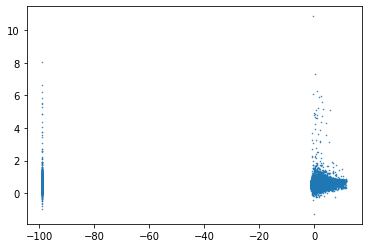

In [22]:
plt.scatter(dat['DDP1_DELTA8'], dat['REST_GMR_0P0'], s=0.25)

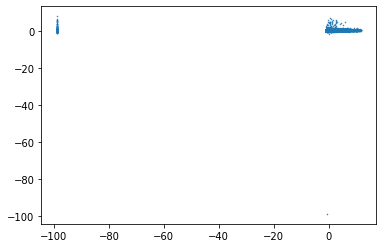

In [23]:
plt.scatter(dat['DDP1_DELTA8'], dat['REST_GMR_0P1'], s=0.25)